# Portfolio Risk Management

## What is portfolio risk management?

Portfolio risk management is the collection and analysis of risks across individual portfolio investments, such as stocks, bonds, money market funds, and cash. Risk is the probability that actual investment returns are less than those that are projected.

## What am I going to do in this notebook?

This notebook is the first practice for portfolio risk management. I am learning the theory in sync with doing practice on this notebook, to easily grasp at the concepts.

## Part 1: Univariate Investment Risk and Return

**Basic concepts:**

- Investment risk is a measure of uncertainty of future returns (or in other words, variance of those returns).
- Discrete stock return = (today's stock price - yesterday's stock price) / yesterday's stock price
- Financial returns:
    - Tend not to be normally distributed
    - Has high probability of outliers
- Standard Deviation is Volatility (usually denoted by σ), which is the degree of variation of a trading price series over time.
- Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. In finance, we want to have a positive skew.
- Kurtosis is a measure of thickness of the tails of a distribution. In normal distribution, kurtosis = 3.
    - Leptokurtic indicates whether kurtosis greater than 3 or not.
    - Excess kurtosis = kurtosis - 3 is claimed using `scipy.stats.kurtosis`.
- Test for normality using the Shapiro-Wilk test.
    - Null hypotheis: data are normally distributed.
    - If p-value <= 0.05 then the null hypothesis is rejected, and the data is non-normally distributed.

In [11]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, shapiro
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
df.head()

,Date,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
0,2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
1,2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2,2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
3,2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
4,2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   AAPL    251 non-null    float64       
 2   MSFT    251 non-null    float64       
 3   XOM     251 non-null    float64       
 4   JNJ     251 non-null    float64       
 5   JPM     251 non-null    float64       
 6   AMZN    251 non-null    float64       
 7   GE      251 non-null    float64       
 8   FB      251 non-null    float64       
 9   T       251 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 19.7 KB


In [19]:
df.describe()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.001637,0.001405,-0.000130,0.000897,0.000997,0.001856,-0.002152,0.001763,-0.000106
std,0.011091,0.009325,0.007043,0.007208,0.010230,0.013207,0.012483,0.010716,0.010697
min,-0.038777,-0.037740,-0.020191,-0.031021,-0.038124,-0.035419,-0.071742,-0.044975,-0.061011
25%,-0.003720,-0.003250,-0.003879,-0.002764,-0.004167,-0.004013,-0.006697,-0.003834,-0.005520
50%,0.000667,0.000731,0.000124,0.000075,0.000117,0.001425,-0.001591,0.001070,0.000000
75%,0.006761,0.006428,0.004372,0.005055,0.006865,0.008580,0.004382,0.008237,0.005646
max,0.060981,0.064119,0.020905,0.034308,0.035258,0.132164,0.035791,0.042490,0.049972


In [4]:
stocks = df.columns.difference(['Date'])
stocks

Index(['AAPL', 'AMZN', 'FB', 'GE', 'JNJ', 'JPM', 'MSFT', 'T', 'XOM'], dtype='object')

Stock code: AAPL


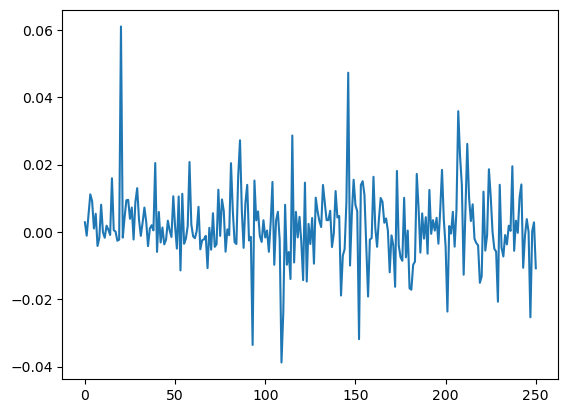

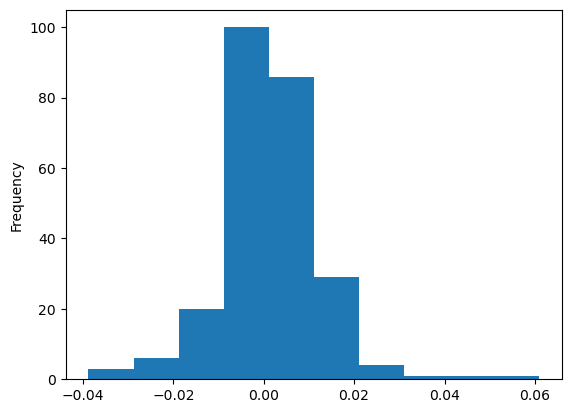

Daily average return: 0.0016365629880900122
Annualized average return: 0.5099503509215253
Daily standard deviation of return (volatility): 0.011068440062785454
Annualized standard deviation of return (volatility): 0.011068440062785454
Skewness of returns distribution: 0.5754598164679054
Kurtosis of returns distribution: 7.8329066662100315
Shapiro results: ShapiroResult(statistic=0.9328486919403076, pvalue=2.8534408169633707e-09)
P-value:  2.8534408169633707e-09 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: AMZN


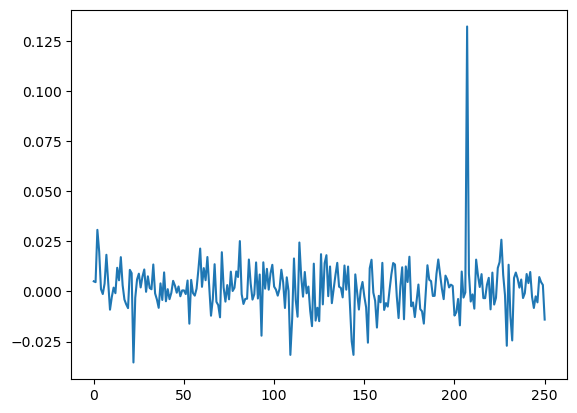

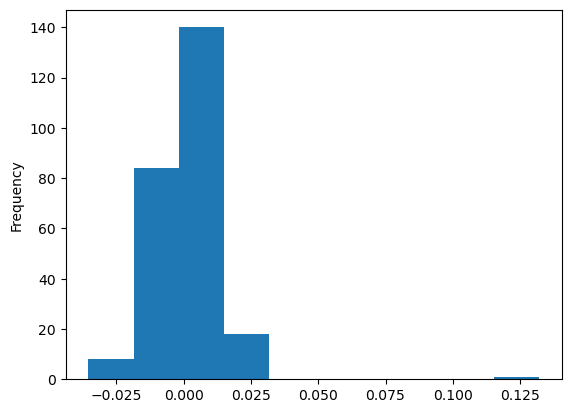

Daily average return: 0.0018563663780647177
Annualized average return: 0.5957927836285324
Daily standard deviation of return (volatility): 0.013180572434256221
Annualized standard deviation of return (volatility): 0.013180572434256221
Skewness of returns distribution: 3.5685074040352496
Kurtosis of returns distribution: 39.590480735927244
Shapiro results: ShapiroResult(statistic=0.772789478302002, pvalue=2.324810136734373e-18)
P-value:  2.324810136734373e-18 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: FB


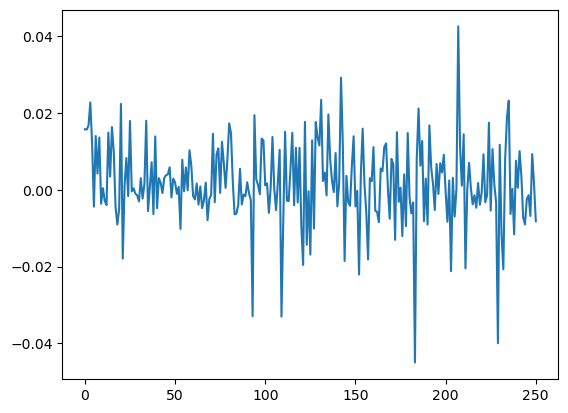

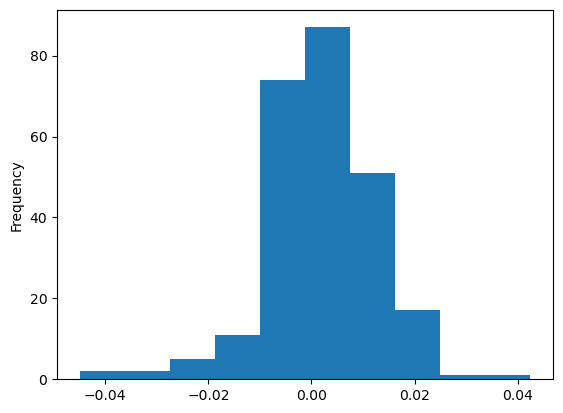

Daily average return: 0.0017628445040918513
Annualized average return: 0.5586899836232722
Daily standard deviation of return (volatility): 0.010694458725347442
Annualized standard deviation of return (volatility): 0.010694458725347442
Skewness of returns distribution: -0.4823558990337609
Kurtosis of returns distribution: 5.750775954957259
Shapiro results: ShapiroResult(statistic=0.9552033543586731, pvalue=5.221606329541828e-07)
P-value:  5.221606329541828e-07 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: GE


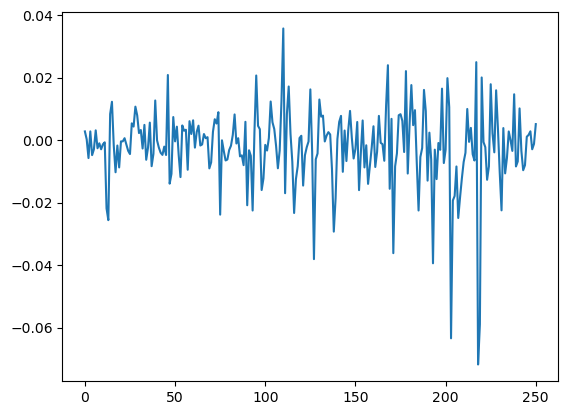

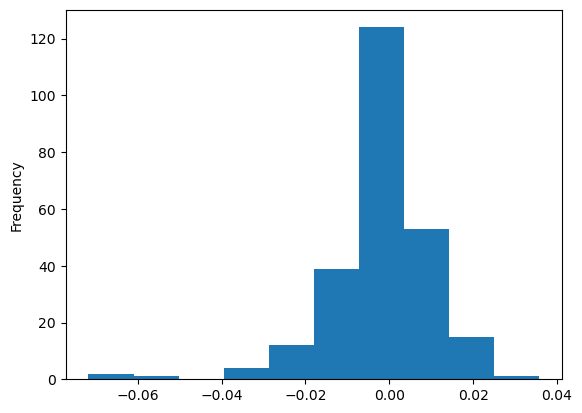

Daily average return: -0.002152303555862823
Annualized average return: -0.4189770480400955
Daily standard deviation of return (volatility): 0.012458362582982324
Annualized standard deviation of return (volatility): 0.012458362582982324
Skewness of returns distribution: -1.5966709687614837
Kurtosis of returns distribution: 10.225439654175005
Shapiro results: ShapiroResult(statistic=0.8819807767868042, pvalue=4.757101288409282e-13)
P-value:  4.757101288409282e-13 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: JNJ


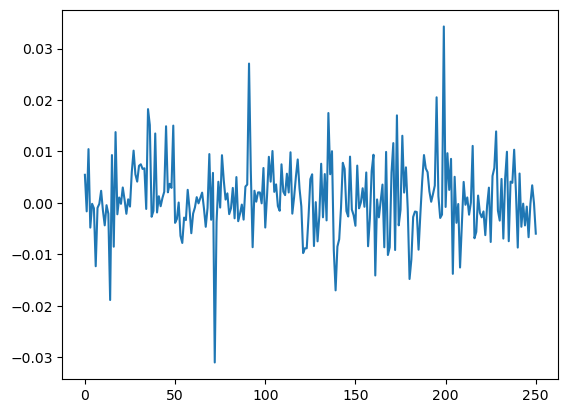

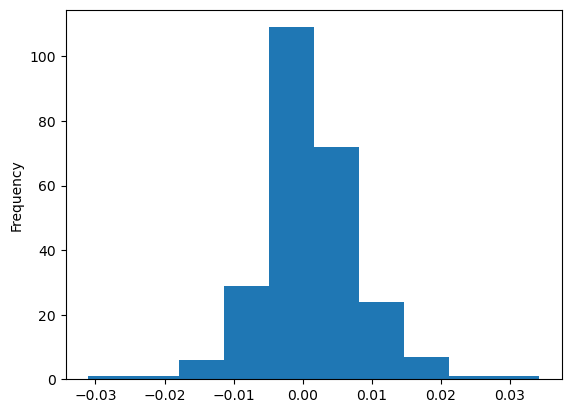

Daily average return: 0.0008968544901825382
Annualized average return: 0.25345789015226683
Daily standard deviation of return (volatility): 0.007193564380655707
Annualized standard deviation of return (volatility): 0.007193564380655707
Skewness of returns distribution: 0.28725534174798345
Kurtosis of returns distribution: 6.276120946947044
Shapiro results: ShapiroResult(statistic=0.9592958688735962, pvalue=1.5798581216586172e-06)
P-value:  1.5798581216586172e-06 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: JPM


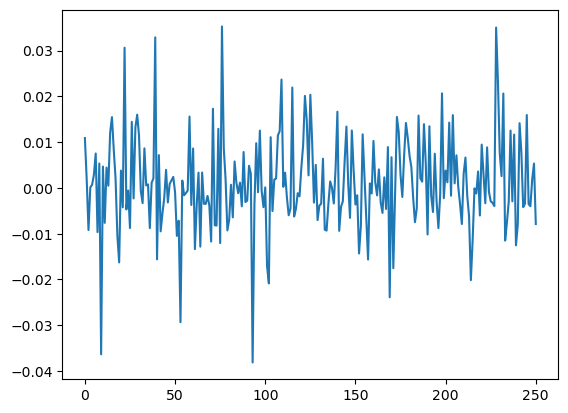

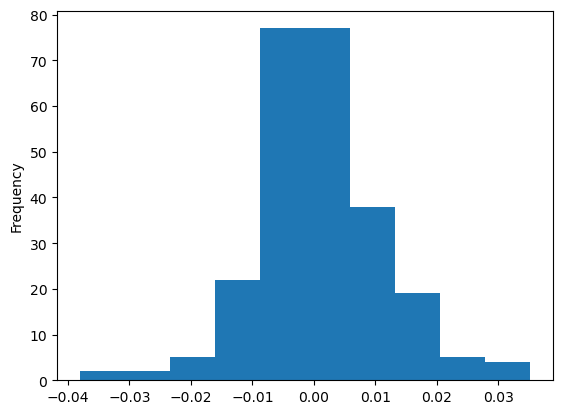

Daily average return: 0.000997171039713136
Annualized average return: 0.2855181891829057
Daily standard deviation of return (volatility): 0.010209311431955418
Annualized standard deviation of return (volatility): 0.010209311431955418
Skewness of returns distribution: 0.0957609935308037
Kurtosis of returns distribution: 5.040394286452681
Shapiro results: ShapiroResult(statistic=0.964812159538269, pvalue=7.756769264233299e-06)
P-value:  7.756769264233299e-06 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: MSFT


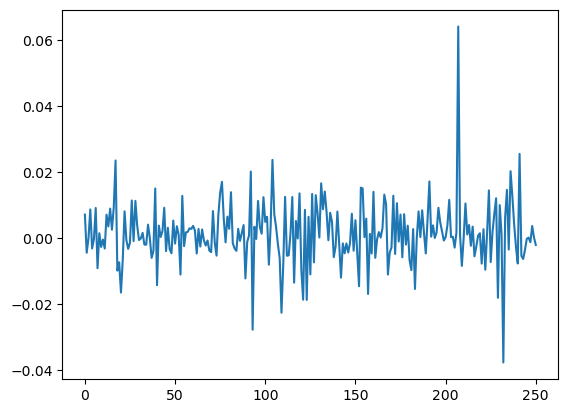

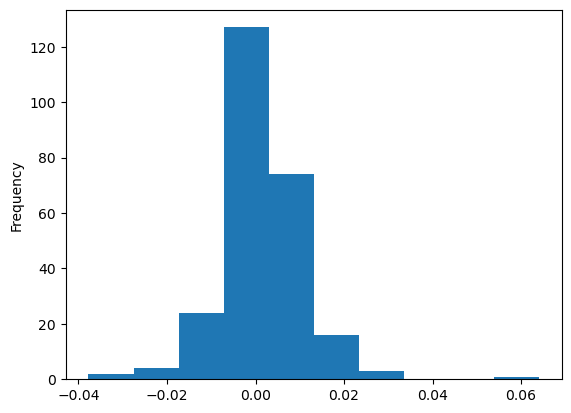

Daily average return: 0.001405223508794589
Annualized average return: 0.42456677615481975
Daily standard deviation of return (volatility): 0.009306242470890859
Annualized standard deviation of return (volatility): 0.009306242470890859
Skewness of returns distribution: 0.8600576563864423
Kurtosis of returns distribution: 11.672851104304812
Shapiro results: ShapiroResult(statistic=0.9143781661987305, pvalue=8.262541345560592e-11)
P-value:  8.262541345560592e-11 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: T


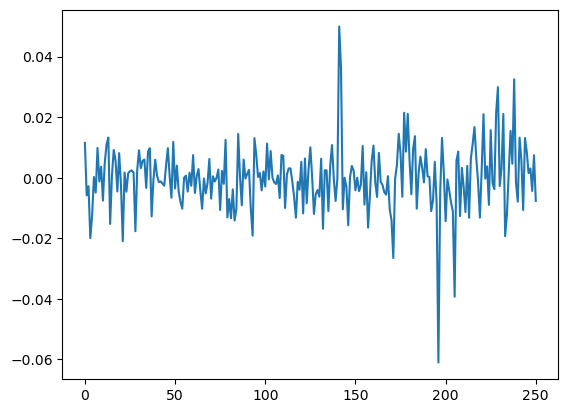

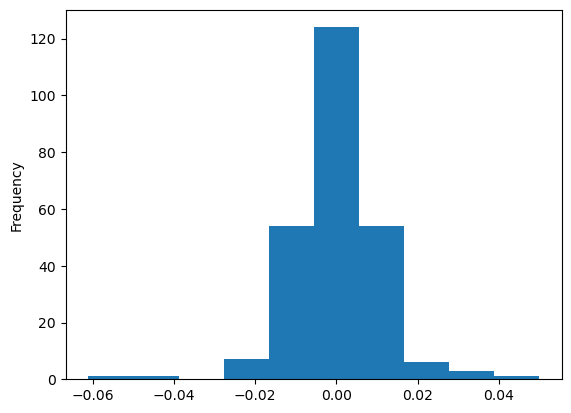

Daily average return: -0.00010576532671025516
Annualized average return: -0.02630218196898615
Daily standard deviation of return (volatility): 0.010675218628584232
Annualized standard deviation of return (volatility): 0.010675218628584232
Skewness of returns distribution: -0.21146357199824936
Kurtosis of returns distribution: 9.21438525534264
Shapiro results: ShapiroResult(statistic=0.9260478019714355, pvalue=7.259323142605467e-10)
P-value:  7.259323142605467e-10 < 0.05 => the data distribution is non-normal
--------------------------------------------------
Stock code: XOM


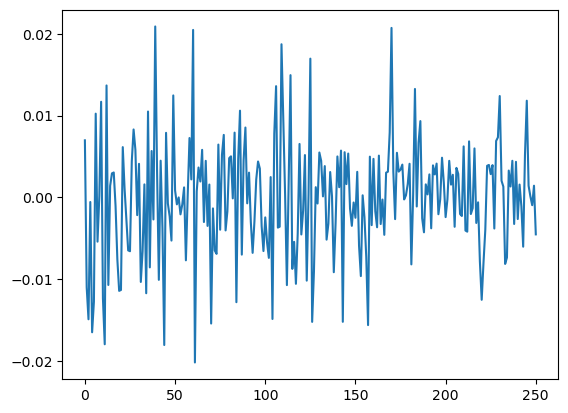

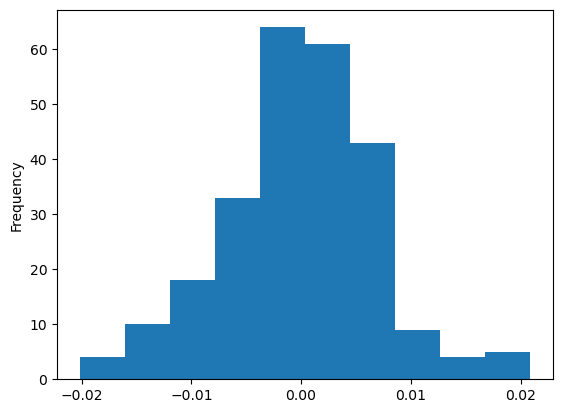

Daily average return: -0.00012990937005839817
Annualized average return: -0.03220915848805972
Daily standard deviation of return (volatility): 0.007029015509737746
Annualized standard deviation of return (volatility): 0.007029015509737746
Skewness of returns distribution: -0.020208300413870898
Kurtosis of returns distribution: 3.633055534665514
Shapiro results: ShapiroResult(statistic=0.9860367178916931, pvalue=0.014987028203904629)
P-value:  0.014987028203904629 < 0.05 => the data distribution is non-normal
--------------------------------------------------


In [25]:
for stock in stocks:
    print("Stock code:", stock)
    
    # Calculate the daily returns of the close price
    stock_returns = df[stock]
    
    # Plot the daily returns
    stock_returns.plot()
    plt.show()
    
    # Plot the returns distribution
    stock_returns.plot.hist()
    plt.show()
    
    # Calculate the average daily return of the stock
    mean_return_daily = stock_returns.mean()
    print("Daily average return:", mean_return_daily)
    
    # Calculate the implied annualized average return (252 is the number of trading days in a year)
    mean_return_annualized = ((1 + mean_return_daily) ** 252) - 1
    print("Annualized average return:", mean_return_annualized)
    
    # Calculate the standard deviation of daily return of the stock
    sigma_daily = np.std(stock_returns)
    print("Daily standard deviation of return (volatility):", sigma_daily)
    
    # Calculate the daily variance
    variance_daily = sigma_daily ** 2
    
    # Annualize the standard deviation
    sigma_annualized = sigma_daily*np.sqrt(252)
    print("Annualized standard deviation of return (volatility):", sigma_daily)
    
    # Calculate the annualized variance
    variance_annualized = sigma_annualized ** 2

    # Calculate the third moment (skewness) of the returns distribution
    returns_skewness = skew(stock_returns)
    print("Skewness of returns distribution:", returns_skewness)
    
    # Calculate the excess kurtosis of the returns distribution
    excess_kurtosis = kurtosis(stock_returns)

    # Derive the true fourth moment of the returns distribution
    fourth_moment = excess_kurtosis + 3
    print("Kurtosis of returns distribution:", fourth_moment)
    
    # Run the Shapiro-Wilk test on the stock returns
    shapiro_results = shapiro(stock_returns)
    print("Shapiro results:", shapiro_results)

    # Extract the p-value from the shapiro_results
    p_value = shapiro_results[1]
    if p_value < 0.05:
        print("P-value: ", p_value, "< 0.05 => the data distribution is non-normal")
    else:
        print("P-value: ", p_value, ">= 0.05 => the data distribution can be normal")
        
    print("-" * 50)